In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [33]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
from scipy.stats.mstats import winsorize
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "useducation"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

us_edu = pd.read_sql_query("select * from useducation", con=engine)

engine.dispose()

<IPython.core.display.Javascript object>

In [4]:
us_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

<IPython.core.display.Javascript object>

In [5]:
# thank  you, notes
fill_list = [
    "ENROLL",
    "TOTAL_REVENUE",
    "FEDERAL_REVENUE",
    "STATE_REVENUE",
    "LOCAL_REVENUE",
    "TOTAL_EXPENDITURE",
    "INSTRUCTION_EXPENDITURE",
    "SUPPORT_SERVICES_EXPENDITURE",
    "OTHER_EXPENDITURE",
    "CAPITAL_OUTLAY_EXPENDITURE",
    "GRADES_PK_G",
    "GRADES_KG_G",
    "GRADES_4_G",
    "GRADES_8_G",
    "GRADES_12_G",
    "GRADES_1_8_G",
    "GRADES_9_12_G",
    "GRADES_ALL_G",
]

states = us_edu["STATE"].unique()

for state in states:
    us_edu.loc[us_edu["STATE"] == state, fill_list] = us_edu.loc[
        us_edu["STATE"] == state, fill_list
    ].interpolate()

# we drop the null values after interpolation
us_edu.dropna(inplace=True)

<IPython.core.display.Javascript object>

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

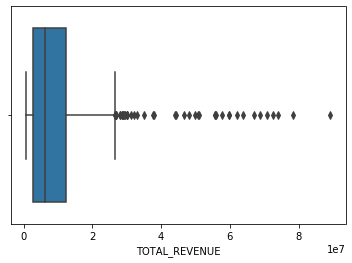

<IPython.core.display.Javascript object>

In [20]:
# visual inspection for outliers, boxplot
sns.boxplot(us_edu["TOTAL_REVENUE"], whis=1.5)


In [12]:
# looks like some outliers, check with stats
q75, q25 = np.percentile(us_edu["TOTAL_REVENUE"], [75, 25])
iqr = q75 - q25
threshold = 1.5
min_val = q25 - (iqr * threshold)
max_val = q75 + (iqr * threshold)
out_count = 0

outliers_df = us_edu
for rev in us_edu["TOTAL_REVENUE"]:
    if rev < min_val or rev > max_val:
        outliers_df = outliers_df.drop(
            outliers_df.loc[outliers_df["TOTAL_REVENUE"] == rev].index
        )

The score threshold is: 1.5


<IPython.core.display.Javascript object>

In [13]:
outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 209 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   421 non-null    object 
 1   STATE                         421 non-null    object 
 2   YEAR                          421 non-null    int64  
 3   ENROLL                        421 non-null    float64
 4   TOTAL_REVENUE                 421 non-null    float64
 5   FEDERAL_REVENUE               421 non-null    float64
 6   STATE_REVENUE                 421 non-null    float64
 7   LOCAL_REVENUE                 421 non-null    float64
 8   TOTAL_EXPENDITURE             421 non-null    float64
 9   INSTRUCTION_EXPENDITURE       421 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  421 non-null    float64
 11  OTHER_EXPENDITURE             421 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    421 non-null    float64
 13  GR

<IPython.core.display.Javascript object>

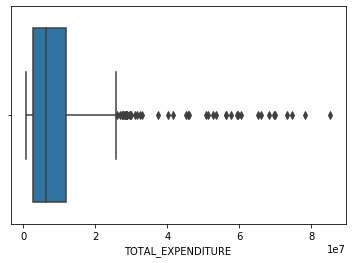

<IPython.core.display.Javascript object>

In [14]:
sns.boxplot(us_edu["TOTAL_EXPENDITURE"])


In [15]:
q75, q25 = np.percentile(us_edu["TOTAL_EXPENDITURE"], [75, 25])
iqr = q75 - q25
threshold = 1.5
min_val = q25 - (iqr * threshold)
max_val = q75 + (iqr * threshold)
out_count = 0

outliers_df = us_edu
for rev in us_edu["TOTAL_EXPENDITURE"]:
    if rev < min_val or rev > max_val:
        outliers_df = outliers_df.drop(
            outliers_df.loc[outliers_df["TOTAL_EXPENDITURE"] == rev].index
        )

<IPython.core.display.Javascript object>

In [16]:
outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 209 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   420 non-null    object 
 1   STATE                         420 non-null    object 
 2   YEAR                          420 non-null    int64  
 3   ENROLL                        420 non-null    float64
 4   TOTAL_REVENUE                 420 non-null    float64
 5   FEDERAL_REVENUE               420 non-null    float64
 6   STATE_REVENUE                 420 non-null    float64
 7   LOCAL_REVENUE                 420 non-null    float64
 8   TOTAL_EXPENDITURE             420 non-null    float64
 9   INSTRUCTION_EXPENDITURE       420 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  420 non-null    float64
 11  OTHER_EXPENDITURE             420 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    420 non-null    float64
 13  GR

<IPython.core.display.Javascript object>

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [29]:
winsorized_revenue = winsorize(us_edu["TOTAL_REVENUE"], (0, 0.1))
winsorized_expenditure = winsorize(us_edu["TOTAL_EXPENDITURE"], (0, 0.1))

<IPython.core.display.Javascript object>

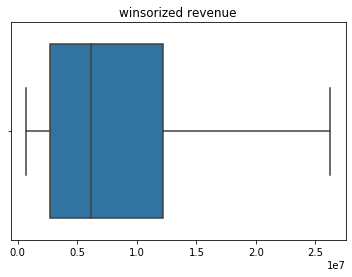

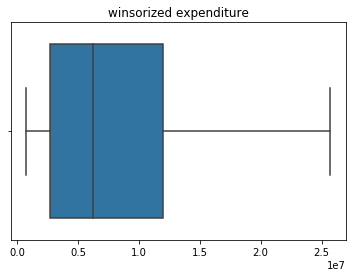

<IPython.core.display.Javascript object>

In [38]:
sns.boxplot(winsorized_revenue)
plt.title("winsorized revenue")
plt.show()

sns.boxplot(winsorized_expenditure)
plt.title("winsorized expenditure")
plt.show()

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [40]:
us_edu["TOTAL_DEFICIT"] = us_edu["TOTAL_REVENUE"] - us_edu["TOTAL_EXPENDITURE"]

<IPython.core.display.Javascript object>

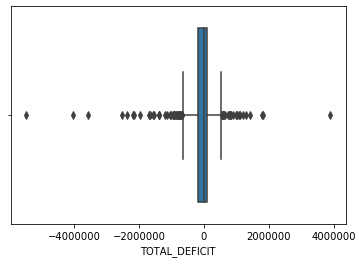

<IPython.core.display.Javascript object>

In [41]:
sns.boxplot(us_edu["TOTAL_DEFICIT"])

In [65]:
winsorized_deficit = winsorize(us_edu["TOTAL_DEFICIT"], (0.1, 0.1))

<IPython.core.display.Javascript object>

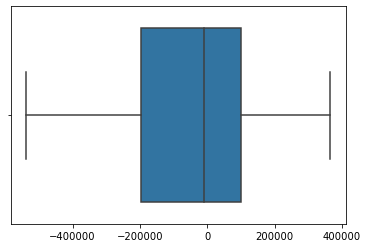

<IPython.core.display.Javascript object>

In [66]:
sns.boxplot(winsorized_deficit, whis=1.5)

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [67]:
us_edu["WINSORIZED_DEFICIT"] = winsorized_revenue - winsorized_expenditure

<IPython.core.display.Javascript object>

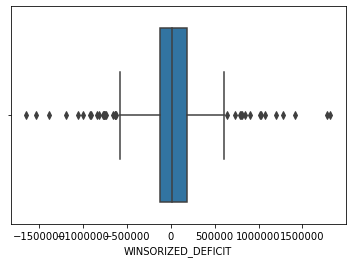

<IPython.core.display.Javascript object>

In [68]:
sns.boxplot(us_edu["WINSORIZED_DEFICIT"])

In [69]:
winsorized_deficit2 = winsorize(us_edu["WINSORIZED_DEFICIT"], (0.1, 0.1))

<IPython.core.display.Javascript object>

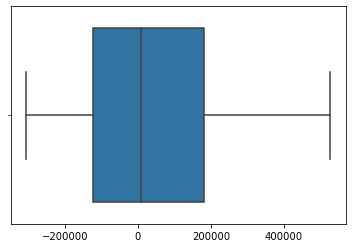

<IPython.core.display.Javascript object>

In [70]:
sns.boxplot(winsorized_deficit2)

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [75]:
pd.DataFrame(
    {
        "original_deficit": us_edu["TOTAL_DEFICIT"],
        "winsorized_deficit_raw": winsorized_deficit,
        "winsorized_deficit_winsorized": winsorized_deficit2,
    }
).describe()

,original_deficit,winsorized_deficit_raw,winsorized_deficit_winsorized
count,4.660000e+02,466.000000,466.000000
mean,-8.094882e+04,-46221.075107,58068.461373
std,6.144222e+05,256023.510074,261701.775745
min,-5.487742e+06,-538253.000000,-306362.000000
25%,-1.965748e+05,-196574.750000,-123882.250000
50%,-8.872500e+03,-8872.500000,8133.500000
75%,1.013948e+05,101394.750000,180287.250000
max,3.897129e+06,365079.000000,526078.000000


<IPython.core.display.Javascript object>